In [2]:
import numpy as np #linear algebra
import pandas as pd

In [3]:
pumpkin = pd.read_excel('/Users/seungwooseo/Desktop/Python/Kaggle/Pumpkin/Pumpkin_Seeds_Dataset/Pumpkin_Seeds_Dataset.xlsx')
pumpkin.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [4]:
pumpkin.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900


In [5]:
pumpkin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [6]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

In [9]:
sc = StandardScaler()
sc.fit(pumpkin.drop(columns=['Class']))

StandardScaler()

In [10]:
feature_scaled = sc.transform(pumpkin.drop(columns=['Class']))

In [11]:
feature_scaled = pd.DataFrame(feature_scaled, columns=pumpkin.drop(columns=['Class']).columns)

In [12]:
feature_scaled.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
0,-1.784703,-2.215755,-2.320224,-0.238536,-1.793218,-1.921174,-2.729935,0.202812,0.855406,1.873763,-1.775063,2.197280
1,-0.294780,-0.568804,-0.700916,0.362089,-0.307244,-0.259343,-0.739163,0.603626,0.359523,0.938377,-0.824864,0.840230
2,-0.661350,-0.432940,-0.369395,-0.633215,-0.642749,-0.645380,0.310476,-1.085518,0.768380,-0.431615,0.074059,-0.211483
3,-1.039412,-1.265424,-1.334616,-0.140076,-1.045689,-1.057939,-1.075756,0.202812,0.761812,1.020648,-1.035351,1.098447
4,-1.065105,-1.209626,-1.293272,-0.229276,-1.045762,-1.086548,-0.934033,-1.285925,-0.295634,0.755950,-0.950840,0.972166


In [12]:
le = LabelEncoder()
le.fit(pumpkin['Class'])
feature_encoded = le.transform(pumpkin['Class'])

In [13]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Not using Cross_Validation

In [32]:
x_train, x_test, y_train, y_test = train_test_split(feature_scaled, feature_encoded, test_size=0.3)

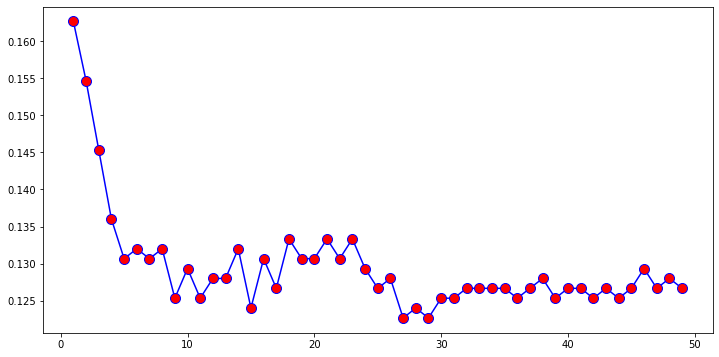

Minimum error_rate n_neighbors value: 27


In [68]:
error_rate = []
min_value = 1.0
min_i = 0
for i in range(1,50):
    knc = KNeighborsClassifier(n_neighbors=i)
    knc.fit(x_train,y_train)
    pred_i = knc.predict(x_test)
    error_rate.append(np.mean(pred_i!=y_test))
    if(error_rate[i-1] < min_value):
        min_i = i
        min_value = error_rate[i-1]

plt.figure(figsize=(12,6))
plt.plot(range(1,50),error_rate,marker='o',color='blue',markerfacecolor='red',markersize=10)
plt.show()
print('Minimum error_rate n_neighbors value:', min_i)

In [69]:
knc = KNeighborsClassifier(n_neighbors=27)
knc.fit(x_train,y_train)
prediction_knc = knc.predict(x_test)
print('KNeighbors Classifier Accuracy:', accuracy_score(y_test,prediction_knc))

KNeighbors Classifier Accuracy: 0.8773333333333333


In [70]:
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=600)

In [71]:
prediction_rfc = rfc.predict(x_test)
print('Random Forst Classifier Accuracy:', accuracy_score(y_test,prediction_rfc))

Random Forst Classifier Accuracy: 0.892


In [72]:
lr = LogisticRegression()

In [73]:
lr.fit(x_train,y_train)
prediction_lr = lr.predict(x_test)
print('Logistic Regression Accuracy:', accuracy_score(y_test,prediction_lr))

Logistic Regression Accuracy: 0.8773333333333333


In [74]:
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [75]:
prediction_svm = svm.predict(x_test)
print('Support Vector Machine Accuracy:', accuracy_score(y_test,prediction_svm))

Support Vector Machine Accuracy: 0.8906666666666667


## Random Forest Accuracy is the highest.

# Using 10 Fold Cross-Validation

In [18]:
from sklearn.model_selection import cross_validate, KFold, cross_val_score

In [26]:
X = feature_scaled
y = feature_encoded
model_knc = KNeighborsClassifier()
k_folds = KFold(n_splits=10)

In [30]:
scores_knc = cross_val_score(model_knc, X,y, cv=k_folds)
print('Average Score of KNearest-Neighbors:', np.mean(scores_knc))

Average Score of KNearest-Neighbors: 0.8608


In [28]:
model_svm = SVC()
scores_svm = cross_val_score(model_svm, X,y, cv=k_folds)
print('Average Score of Support Vector Machine:', np.mean(scores_svm))

Average Score of Support Vector Machine: 0.8704000000000001


In [29]:
model_rfc = RandomForestClassifier()
scores_rfc = cross_val_score(model_rfc, X,y, cv=k_folds)
print('Average Score of Random Forest:', np.mean(scores_rfc))

Average Score of Random Forest: 0.8744


In [31]:
model_lr = LogisticRegression()
scores_lr = cross_val_score(model_lr, X,y, cv=k_folds)
print('Average Score of Logistic Regression:', np.mean(scores_lr))

Average Score of Logistic Regression: 0.8540000000000001


## Also Random Forest Classifier is the highest.

In [33]:
git init

SyntaxError: invalid syntax (2275228585.py, line 1)